# Lab 1 - Univariate and Multivariate analysis

## Content identification

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# import pandas_profiling as pp
from pandas.plotting import register_matplotlib_converters
import numpy as np
import seaborn as sns

register_matplotlib_converters()

In [2]:
data = pd.read_csv('datasets/pd_speech_features.csv', header=1, sep=',', decimal='.')
data.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [3]:
data.shape

(756, 755)

In [4]:
len(data[data.gender==1])

390

In [5]:
len(data[data.gender==0])

366

According to the dataset description: There are 3 records of each patient, and the data is divided in a study group (188 patients, which 107 are men and 81 women) and a control group (64 people without the disease, which 23 are men and 41 women).
Thinking about training and testing, leaving the three records of each could make the model biased since we could train with two records of the patient ant then test with the one left. Because of this, every 3 records will be summarize by their mean.

In [6]:
data = data.groupby(data.id).mean()
data.head()

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.823387,0.696370,0.567250,235.333333,234.333333,0.008220,0.000073,0.001963,0.000016,...,1.561733,2.862000,12.293333,9.717500,9.055300,6.259100,4.021533,4.164333,22.961700,1.0
1,0.0,0.415637,0.793993,0.592453,213.333333,211.000000,0.008884,0.001849,0.005790,0.000050,...,4.918567,4.827133,6.117633,8.599667,5.737233,7.933133,5.490533,4.941833,4.467233,1.0
2,1.0,0.801973,0.619967,0.520563,319.333333,318.333333,0.006041,0.000104,0.002217,0.000013,...,41.129400,31.201933,14.584467,5.446800,3.462000,4.772067,9.176633,11.848100,5.552367,1.0
3,0.0,0.828707,0.626097,0.537183,493.000000,492.000000,0.003913,0.000042,0.000757,0.000003,...,1.677633,1.908400,2.842167,3.493867,3.282433,3.085267,3.184433,4.032933,22.773633,1.0
4,0.0,0.831287,0.779397,0.726717,362.666667,361.666667,0.005622,0.002023,0.003593,0.000021,...,4.104600,4.285233,2.953200,2.799933,2.645100,2.811367,7.268333,13.338833,63.766900,1.0


In [7]:
data.shape

(252, 754)

## Variables Type and Domain

In [8]:
data.dtypes

gender                        float64
PPE                           float64
DFA                           float64
RPDE                          float64
numPulses                     float64
numPeriodsPulses              float64
meanPeriodPulses              float64
stdDevPeriodPulses            float64
locPctJitter                  float64
locAbsJitter                  float64
rapJitter                     float64
ppq5Jitter                    float64
ddpJitter                     float64
locShimmer                    float64
locDbShimmer                  float64
apq3Shimmer                   float64
apq5Shimmer                   float64
apq11Shimmer                  float64
ddaShimmer                    float64
meanAutoCorrHarmonicity       float64
meanNoiseToHarmHarmonicity    float64
meanHarmToNoiseHarmonicity    float64
minIntensity                  float64
maxIntensity                  float64
meanIntensity                 float64
f1                            float64
f2          

In [9]:
cat_vars = data.select_dtypes(include='object')
for att in cat_vars:
    print(att, data[att].unique())

There are no object type in the dataset

## Missing values

In [10]:
mv = {}
count_na = 0
for var in data:
    mv[var] = data[var].isna().sum()
    count_na += data[var].isna().sum()
print('Total of missing values on dataset:', count_na)
# mv

Total of missing values on dataset: 0


## Variables Distribuition

In [11]:
data.describe()

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02,...,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,0.515873,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,1.673391e-05,...,26.237251,22.840337,18.587888,13.872018,12.218953,12.375335,14.799230,14.751559,31.481110,0.746032
std,0.500743,0.119996,0.066284,0.127195,93.227761,93.399366,0.001700,0.000534,0.002385,2.074856e-05,...,35.525687,25.893491,20.057960,16.069665,14.661894,13.354262,12.378443,11.523976,29.458776,0.436146
min,0.000000,0.314347,0.555967,0.193853,88.666667,82.333333,0.003273,0.000014,0.000270,9.106667e-07,...,1.526233,1.579100,1.867967,2.203400,1.949200,2.079533,2.330300,2.283500,2.890800,0.000000
25%,0.000000,0.691873,0.651182,0.393635,257.333333,256.333333,0.005082,0.000059,0.001078,5.901667e-06,...,2.820458,4.473508,4.436750,3.699583,3.380817,3.651750,4.897958,4.978075,5.056667,0.000000
50%,1.000000,0.802037,0.699407,0.483117,317.333333,316.166667,0.006092,0.000103,0.001523,9.765000e-06,...,8.644883,10.489583,9.489333,6.323717,5.392867,6.909650,9.492500,10.598483,17.294033,1.000000
75%,1.000000,0.823919,0.752511,0.575137,383.666667,382.166667,0.007510,0.000535,0.002617,1.956750e-05,...,38.554292,35.420017,26.345942,15.808783,14.024783,15.095608,23.127600,23.136125,57.496050,1.000000
max,1.000000,0.869927,0.851113,0.826477,603.333333,596.000000,0.011608,0.002675,0.022580,1.902327e-04,...,187.323300,146.324000,107.571533,84.135067,66.894200,63.020433,56.747467,47.937033,94.838167,1.000000


In [12]:
# report of all data
# profile = pp.ProfileReport(data)
# since it take a while, it's possible to create an html file to see without running the cell again
# pp.ProfileReport(data).to_file()

In [13]:
# creates a list of rejected variables from profile
# rejected_variables = profile.get_rejected_variables()

# creates a list of rejected variables without using profile (to avoid the time to do the whole report)
def reject_variables(variables, reject=0.9):
    corr_mtx = variables.corr()
    rejected_corr = []
    for row in np.arange(corr_mtx.shape[0]):
        for column in np.arange(row+1, corr_mtx.shape[1]):
            if abs(corr_mtx.iloc[row, column]) > reject:
                rejected_corr.append(corr_mtx.columns.values.tolist()[column])
    return rejected_corr

rejected_variables = reject_variables(data, 0.8)
# maybe 0.8 is too little, but it will be used here, because there are 755 columns

In [14]:
# dataframe with only the non rejected variables
new_data = data.loc[:, ~data.columns.isin(rejected_variables)]
new_data.head()

,gender,PPE,DFA,RPDE,numPulses,stdDevPeriodPulses,locPctJitter,locShimmer,meanAutoCorrHarmonicity,minIntensity,...,tqwt_kurtosisValue_dec_21,tqwt_kurtosisValue_dec_22,tqwt_kurtosisValue_dec_23,tqwt_kurtosisValue_dec_24,tqwt_kurtosisValue_dec_25,tqwt_kurtosisValue_dec_26,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_30,class
id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.823387,0.696370,0.567250,235.333333,0.000073,0.001963,0.071003,0.976658,66.691702,...,3.063067,2.100667,1.756133,1.694267,2.437633,1.591700,1.546500,1.561733,12.293333,1.0
1,0.0,0.415637,0.793993,0.592453,213.333333,0.001849,0.005790,0.062710,0.950272,75.679080,...,1.935867,2.484133,2.157100,1.862933,1.831233,1.881900,7.049367,4.918567,6.117633,1.0
2,1.0,0.801973,0.619967,0.520563,319.333333,0.000104,0.002217,0.040953,0.988194,75.115737,...,1.735567,1.589467,1.673333,2.301967,1.577067,1.590333,1.581967,41.129400,14.584467,1.0
3,0.0,0.828707,0.626097,0.537183,493.000000,0.000042,0.000757,0.049467,0.991718,70.894192,...,2.358100,2.058267,2.148733,2.357367,4.138300,5.676767,2.382533,1.677633,2.842167,1.0
4,0.0,0.831287,0.779397,0.726717,362.666667,0.002023,0.003593,0.159193,0.895530,57.435886,...,2.706200,2.167767,1.903700,1.897600,3.384267,3.614567,3.881267,4.104600,2.953200,1.0


In [15]:
baseline = data.iloc[:,0:23]
rejected_baseline = reject_variables(baseline, 0.8)
new_baseline = baseline.loc[:, ~baseline.columns.isin(rejected_baseline)]
new_baseline.columns

Index(['gender', 'PPE', 'DFA', 'RPDE', 'numPulses', 'stdDevPeriodPulses',
       'locPctJitter', 'locShimmer', 'meanAutoCorrHarmonicity',
       'minIntensity'],
      dtype='object')

To understand better the distribuition of the data, two types graphics will be plotted: boxplots; histograms (with and without a Gaussian and an exponencial to compare). These way, it'll be possible to look for outliers and for similar distributions.
Because of the high number of variables, the ways choosen to be plotted was: the Baseline Features not rejected by the Profile Report and at least one of each group (the first line of the csv was considered as groups):
    - No group: 'gender', 'class'
    - Baseline Features: 'PPE', 'DFA', 'RPDE', 'numPulses', 'stdDevPeriodPulses', 'locPctJitter', 'locShimmer', 'meanAutoCorrHarmonicity'
    - Intensity Parameters: 'minIntensity'
    - Formant Frequencies: 'f1'
    - Bandwidth Parameters: 'b1'
    - Vocal Fold: 'GQ_prc5_95', 'GNE_mean', 'VFER_NSR_SEO'
    - MFCC: 'mean_Log_energy'
    - Wavelet Features: 'Ea'
    - TQWT Features: 'tqwt_energy_dec_1'
Plotting all the features and analyzing would give more information, but, since it's way too many, the analyzes of the others features will be more superficial

In [16]:
analysis = new_data[['gender', 'PPE', 'DFA', 'RPDE', 'numPulses', 'stdDevPeriodPulses', 'locPctJitter', 'locShimmer', 'meanAutoCorrHarmonicity', 'minIntensity', 'f1', 'b1', 'GQ_prc5_95', 'GNE_mean', 'VFER_NSR_SEO', 'mean_Log_energy', 'Ea', 'tqwt_energy_dec_1', 'class']]
analysis.head()

,gender,PPE,DFA,RPDE,numPulses,stdDevPeriodPulses,locPctJitter,locShimmer,meanAutoCorrHarmonicity,minIntensity,f1,b1,GQ_prc5_95,GNE_mean,VFER_NSR_SEO,mean_Log_energy,Ea,tqwt_energy_dec_1,class
id,,,,,,,,,,,,,,,,,,,
0,1.0,0.823387,0.696370,0.567250,235.333333,0.000073,0.001963,0.071003,0.976658,66.691702,550.716984,106.648472,0.80282,1.014870,1.318667,9.280100,99.999767,0.000024,1.0
1,0.0,0.415637,0.793993,0.592453,213.333333,0.001849,0.005790,0.062710,0.950272,75.679080,832.920994,293.239513,0.89839,0.841437,1.292733,9.933833,99.098867,0.000045,1.0
2,1.0,0.801973,0.619967,0.520563,319.333333,0.000104,0.002217,0.040953,0.988194,75.115737,683.269240,122.703801,1.00000,0.833660,1.346033,9.894100,99.996000,0.000076,1.0
3,0.0,0.828707,0.626097,0.537183,493.000000,0.000042,0.000757,0.049467,0.991718,70.894192,712.242460,106.489904,1.00000,1.631433,1.367367,9.667233,99.999300,0.000017,1.0
4,0.0,0.831287,0.779397,0.726717,362.666667,0.002023,0.003593,0.159193,0.895530,57.435886,504.376144,652.363445,0.91351,0.840813,1.208767,9.369700,99.998367,0.000425,1.0


<Figure size 432x288 with 0 Axes>

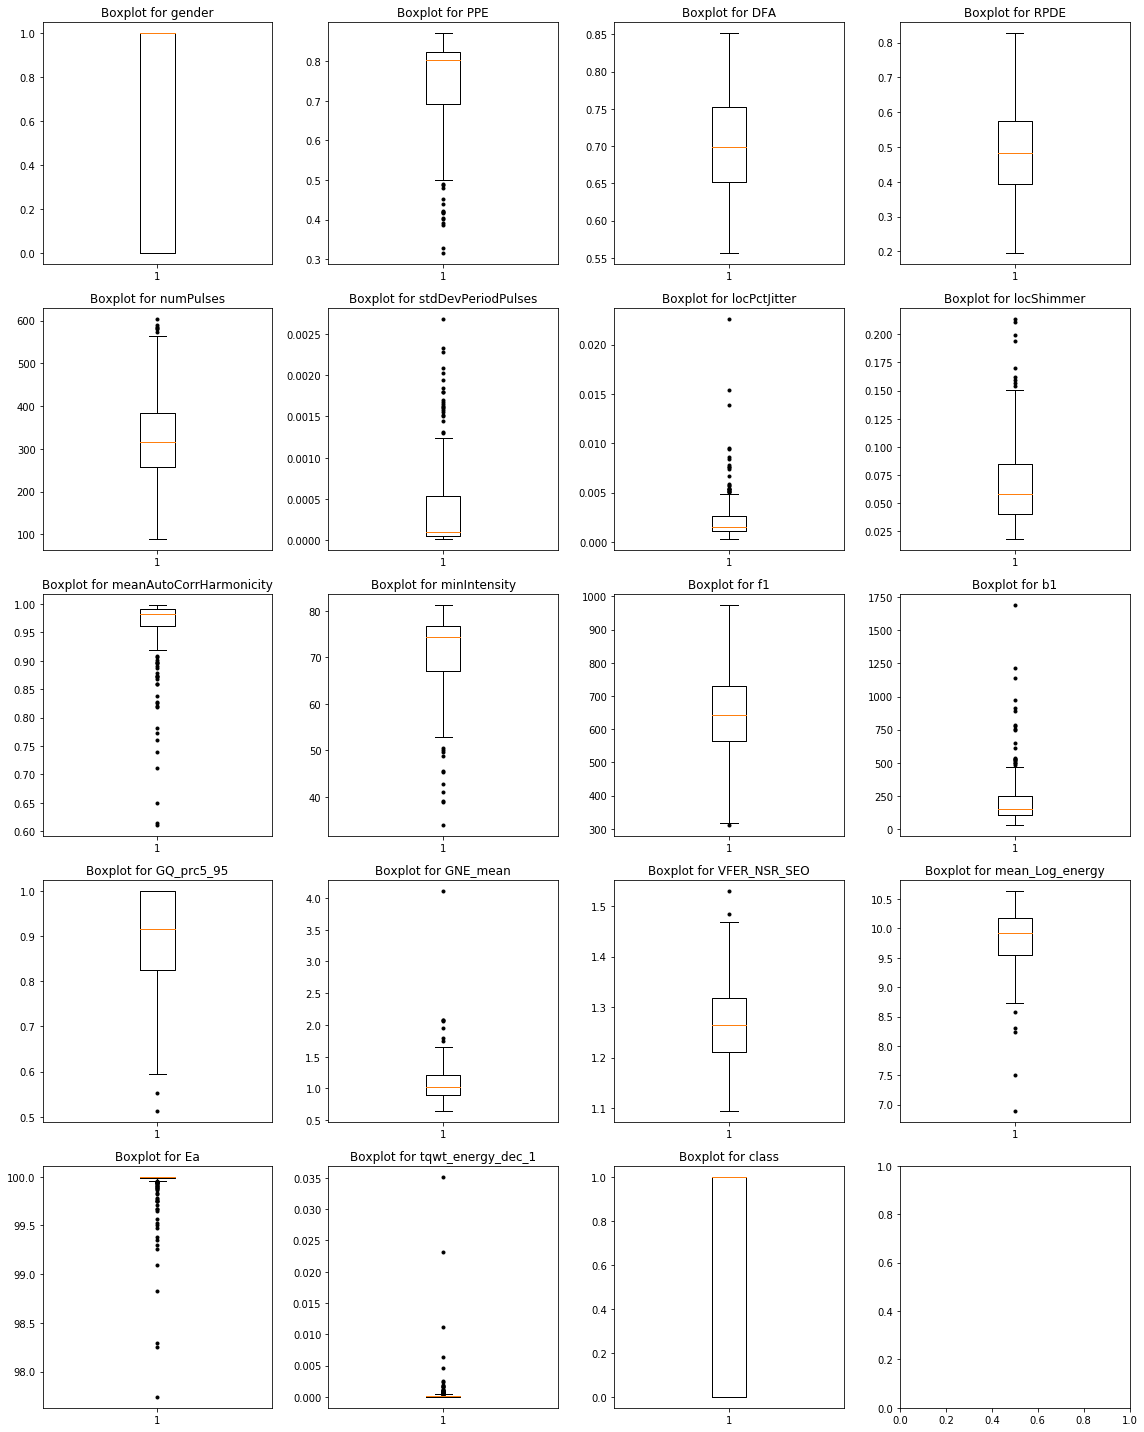

In [17]:
def choose_grid(n):
    if (n % 4 == 0):
        return n // 4, 4
    else:
        return n // 4 + 1, 4

columns = analysis.select_dtypes(include='number').columns
rows, cols = choose_grid(len(columns))
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
i, j = 0, 0
for n in range(len(columns)):
    axs[i, j].set_title('Boxplot for %s'%columns[n])
    axs[i, j].boxplot(analysis[columns[n]].dropna().values, sym='k.')
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
fig.tight_layout()
plt.show()

There are a lot of outliers, so it's not possible to ignore these records.

<Figure size 432x288 with 0 Axes>

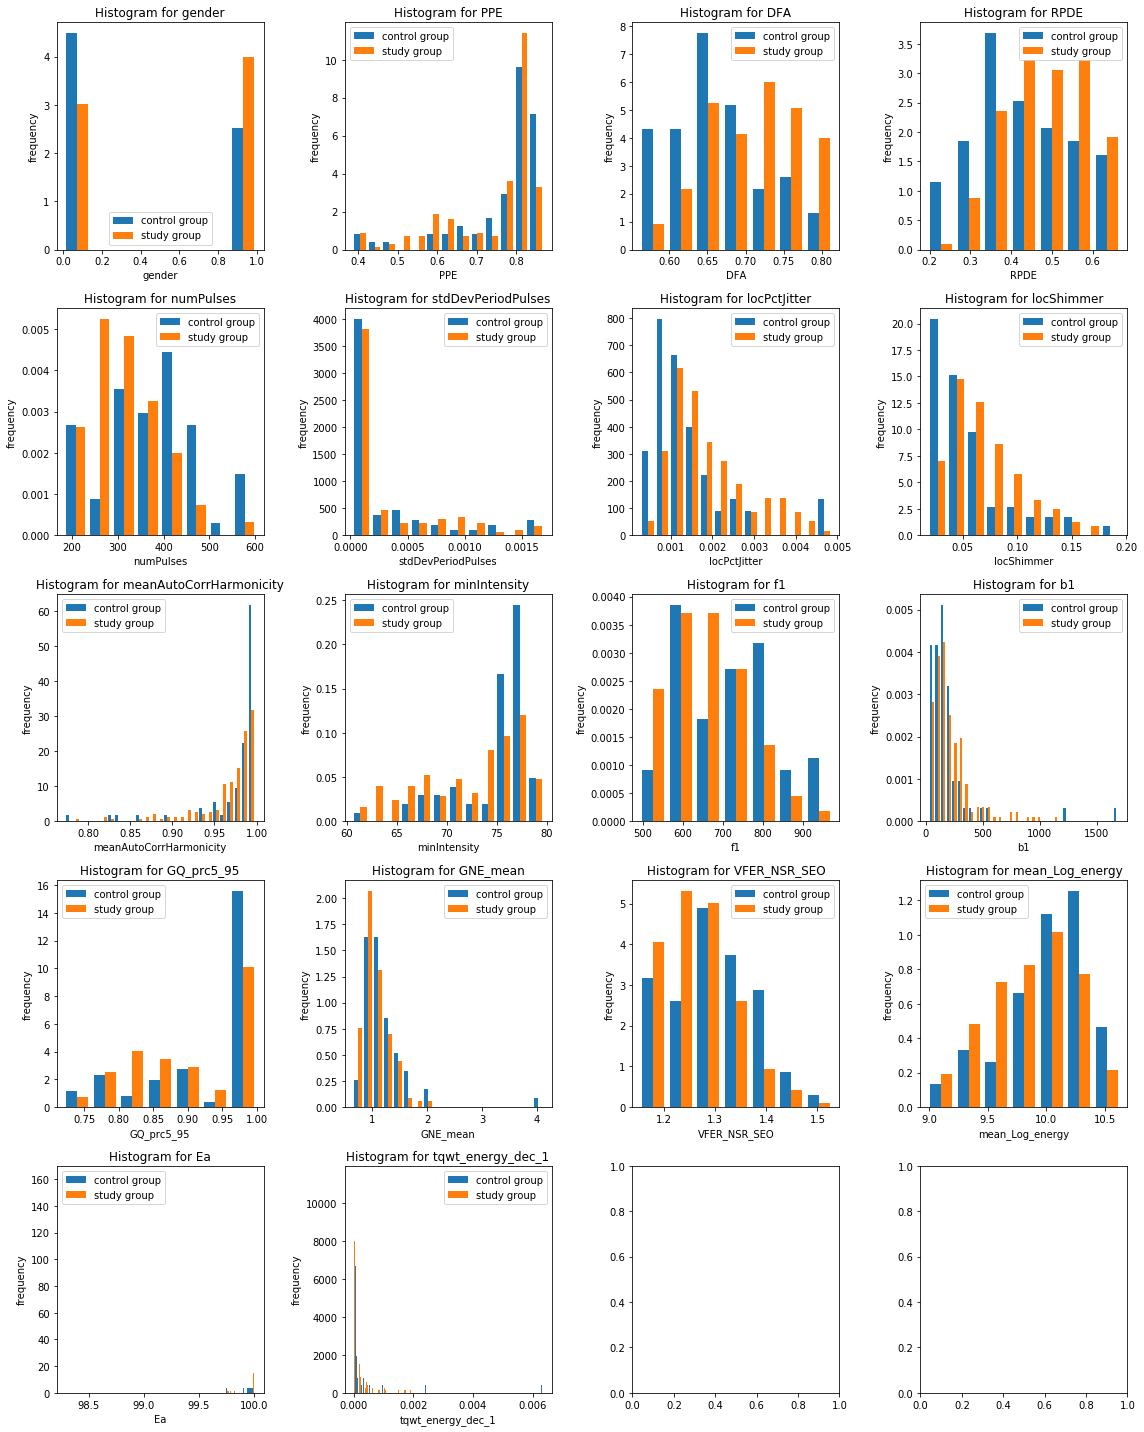

In [18]:
columns = analysis.select_dtypes(include='number').columns
rows, cols = choose_grid(len(columns))
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
i, j = 0 , 0
for n in range(len(columns)):
    if (columns[n] == 'class'):
        continue
    axs[i, j].set_title('Histogram for %s'%columns[n])
    axs[i, j].set_xlabel(columns[n])
    axs[i, j].set_ylabel('frequency')
    axs[i, j].hist([analysis[analysis['class']==0][columns[n]].dropna().values, analysis[analysis['class']==1][columns[n]].dropna().values], 'auto', label=['control group', 'study group'], density=True)
    axs[i, j].legend(loc='best')
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
fig.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

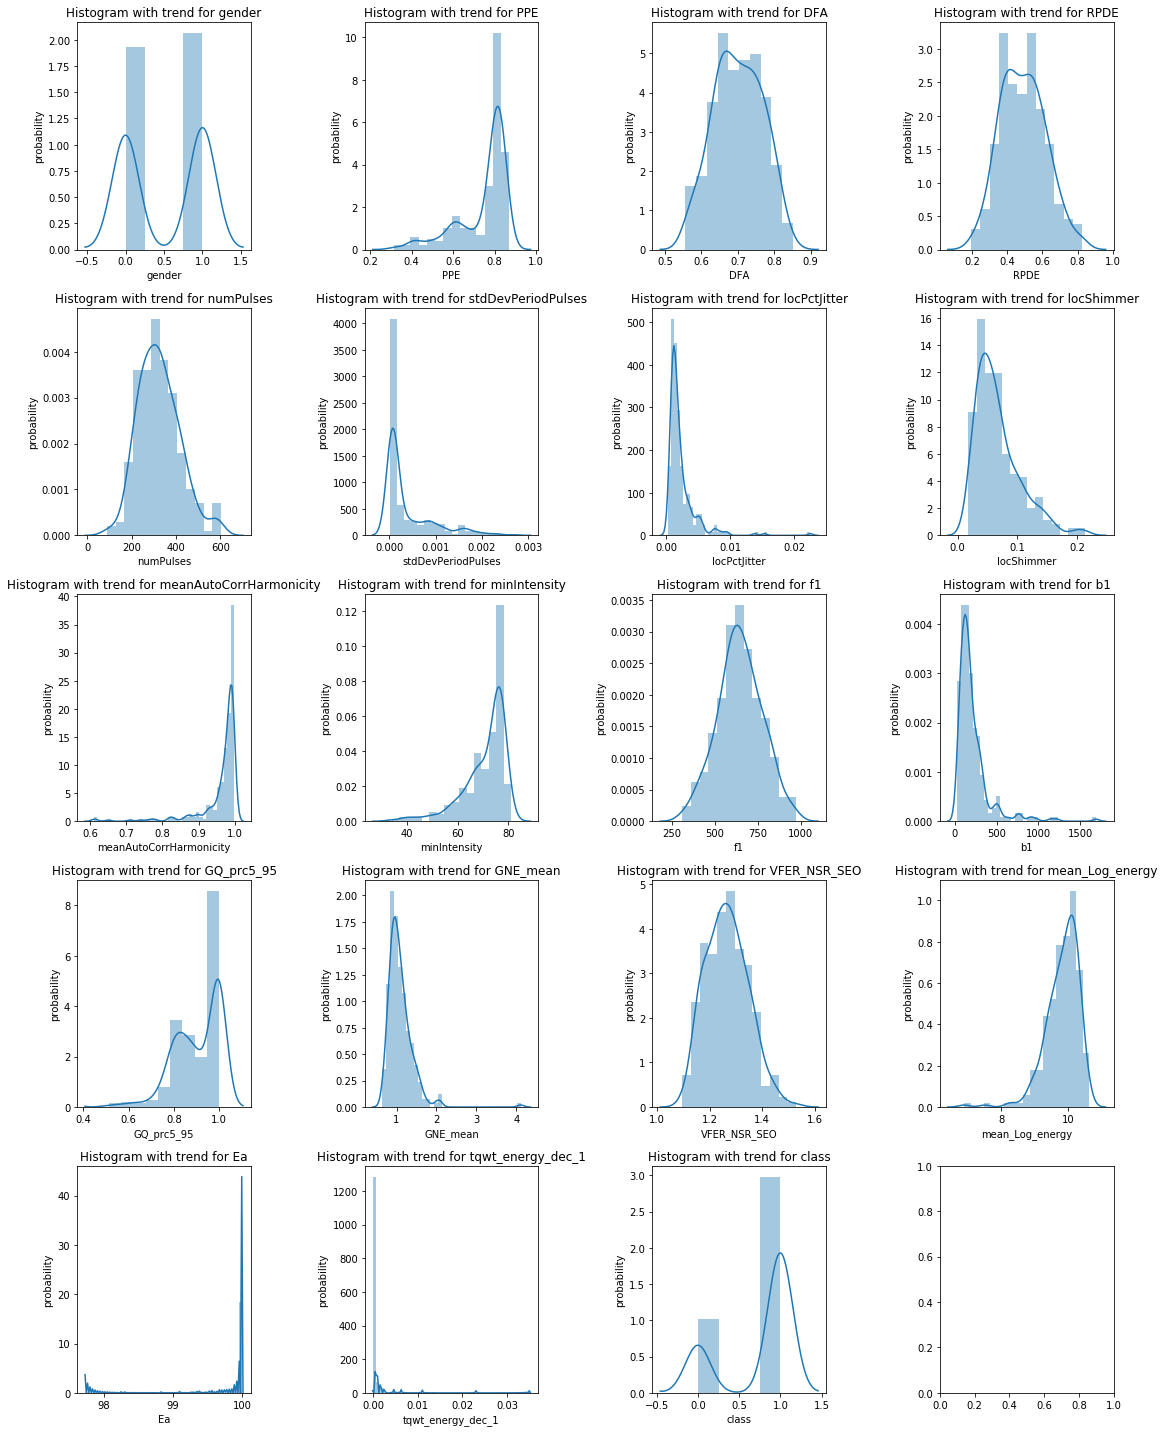

In [19]:
import seaborn as sns

columns = analysis.select_dtypes(include='number').columns
rows, cols = choose_grid(len(columns))
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
i, j = 0, 0
for n in range(len(columns)):
    axs[i, j].set_title('Histogram with trend for %s'%columns[n])
    axs[i, j].set_ylabel("probability")
    sns.distplot(analysis[columns[n]].dropna().values, norm_hist=True, ax=axs[i, j], axlabel=columns[n])
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
fig.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

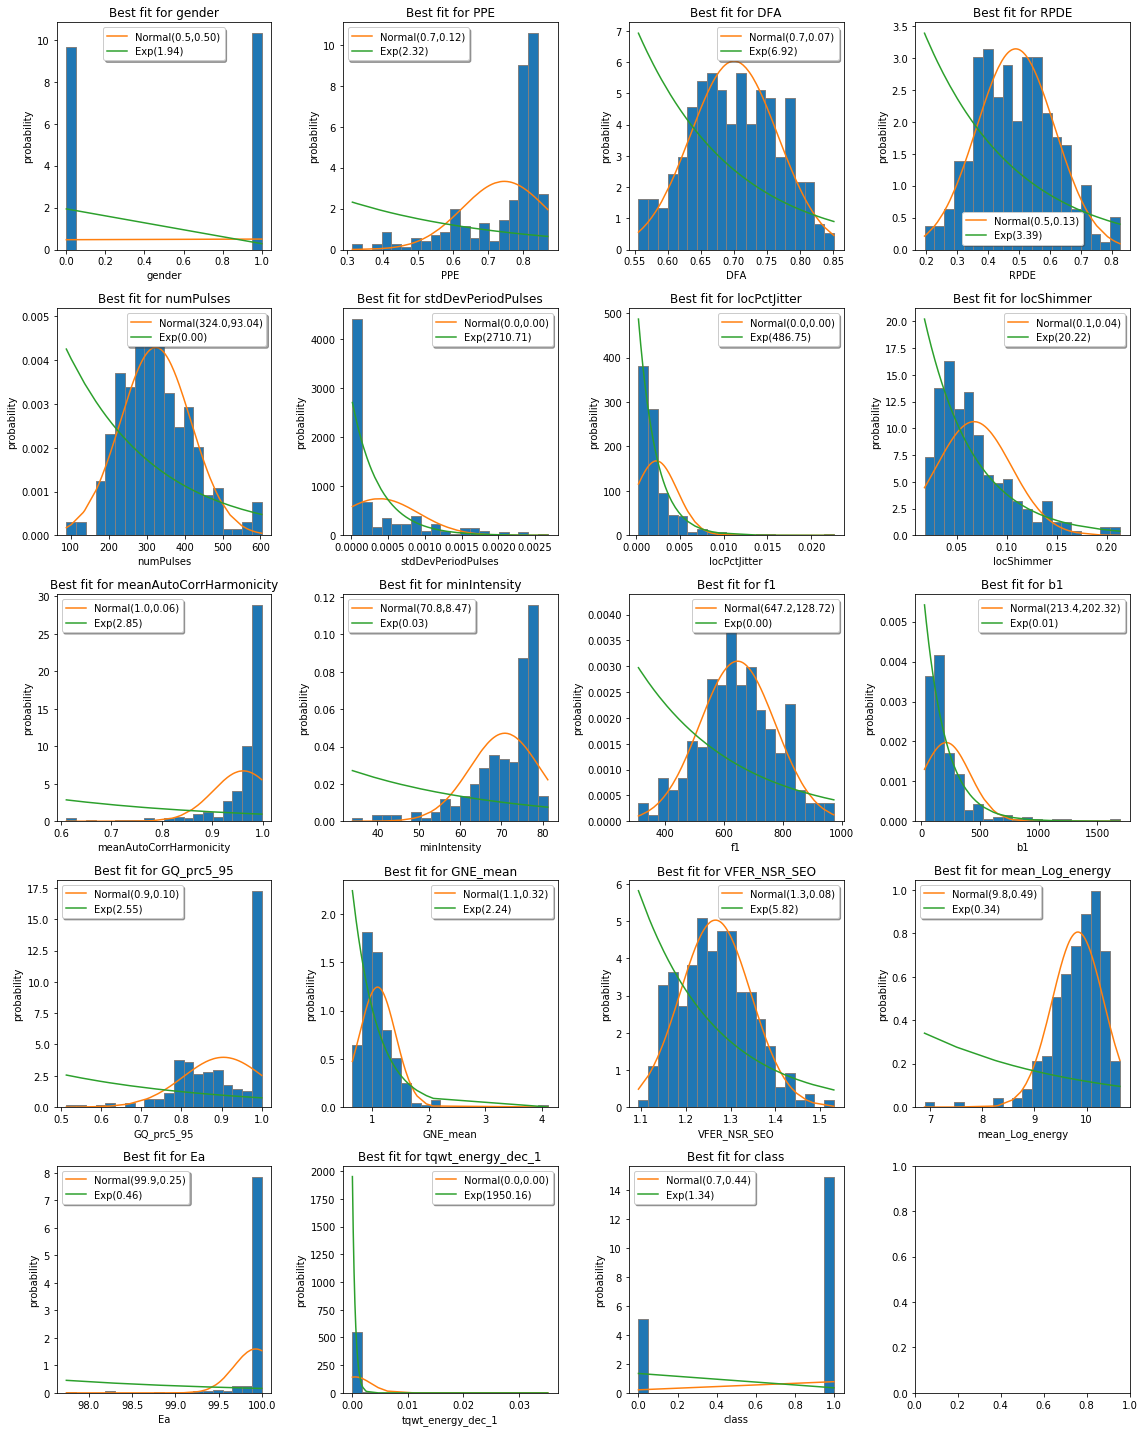

In [20]:
import scipy.stats as _stats 
def multiple_line_chart(ax: plt.Axes, xvalues: list, yvalues: dict, title: str, xlabel: str, ylabel: str, percentage=False):
    legend: list = []
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if percentage:
        ax.set_ylim(0.0, 1.0)

    for name, y in yvalues.items():
        ax.plot(xvalues, y)
        legend.append(name)
    ax.legend(legend, loc='best', fancybox = True, shadow = True)
    
def compute_known_distributions(x_values, n_bins) -> dict:
    distributions = dict()
    # Gaussian
    mean, sigma = _stats.norm.fit(x_values)
    distributions['Normal(%.1f,%.2f)'%(mean,sigma)] = _stats.norm.pdf(x_values, mean, sigma)
    # LogNorm
  #  sigma, loc, scale = _stats.lognorm.fit(x_values)
  #  distributions['LogNor(%.1f,%.2f)'%(np.log(scale),sigma)] = _stats.lognorm.pdf(x_values, sigma, loc, scale)
    # Exponential
    loc, scale = _stats.expon.fit(x_values)
    distributions['Exp(%.2f)'%(1/scale)] = _stats.expon.pdf(x_values, loc, scale)
    # SkewNorm
   # a, loc, scale = _stats.skewnorm.fit(x_values)
   # distributions['SkewNorm(%.2f)'%a] = _stats.skewnorm.pdf(x_values, a, loc, scale) 
    return distributions

def histogram_with_distributions(ax: plt.Axes, series: pd.Series, var: str):
    values = series.sort_values().values
    n, bins, patches = ax.hist(values, 20, density=True, edgecolor='grey')
    distributions = compute_known_distributions(values, bins)
    multiple_line_chart(ax, values, distributions, 'Best fit for %s'%var, var, 'probability')

columns = analysis.select_dtypes(include='number').columns
rows, cols = choose_grid(len(columns))
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
i, j = 0, 0
for n in range(len(columns)):
    histogram_with_distributions(axs[i, j], analysis[columns[n]].dropna(), columns[n])
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
fig.tight_layout()
plt.show()

Finally, it'll be analyzed the effects of granularity for each variable.

<Figure size 432x288 with 0 Axes>

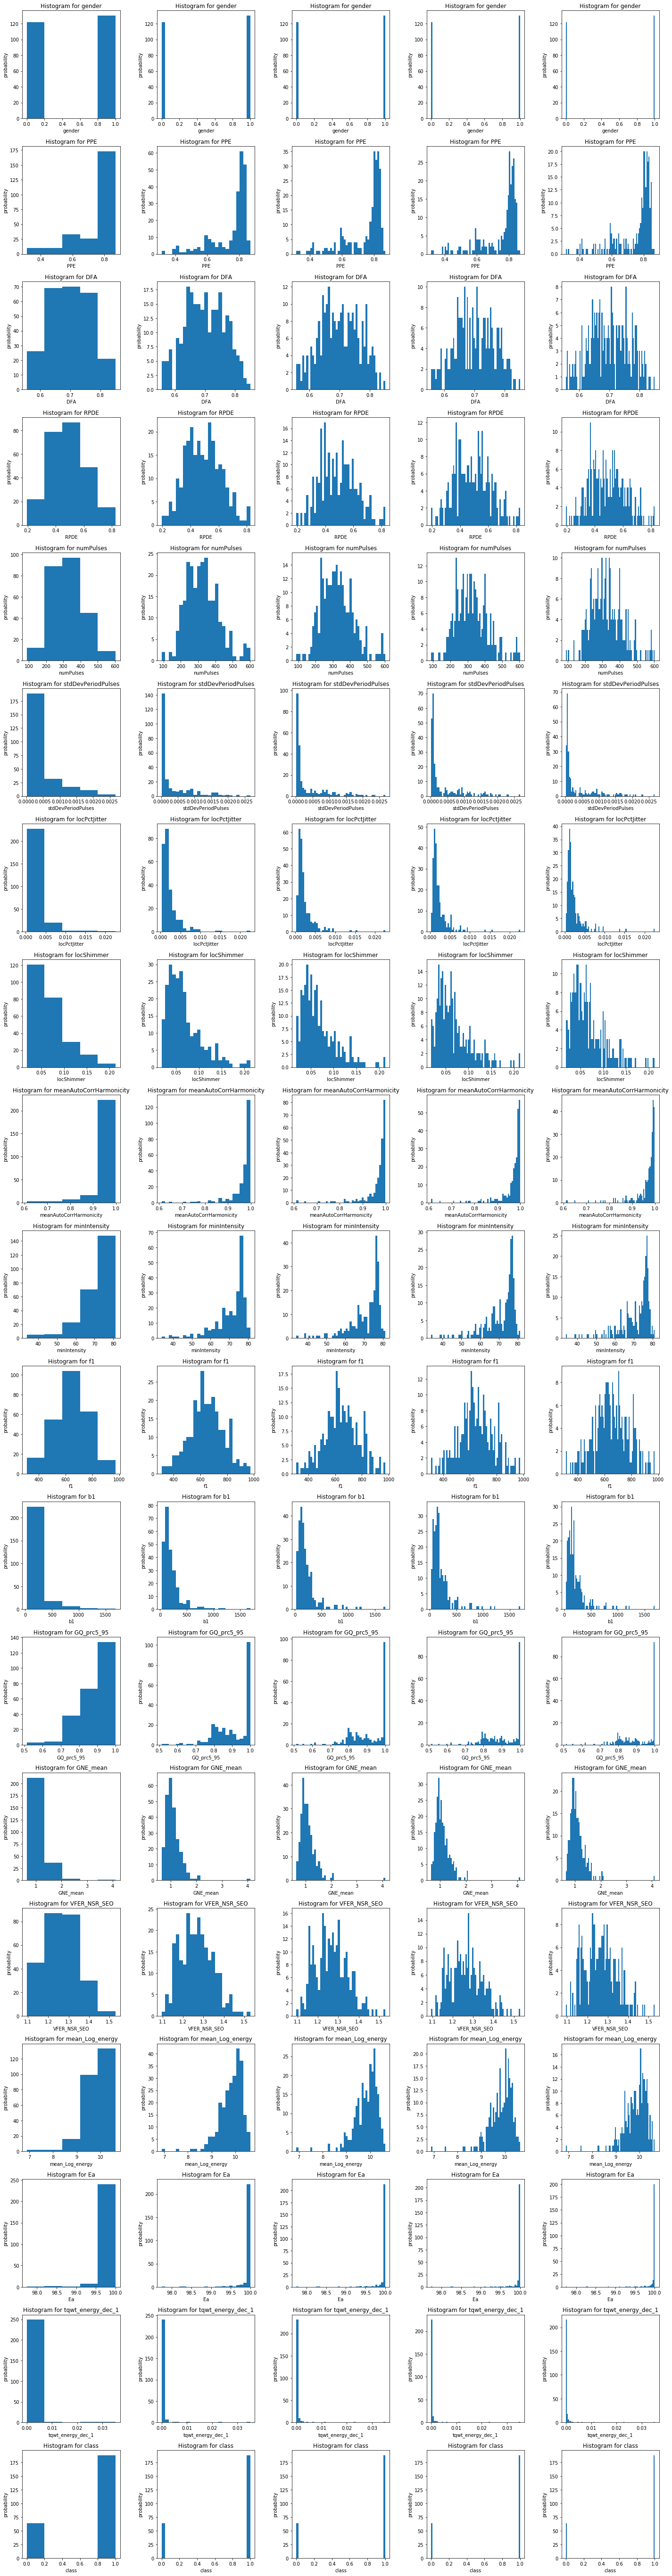

In [21]:
columns = analysis.select_dtypes(include='number').columns
rows = len(columns)
cols = 5
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
bins = range(5, 100, 20)
for i in range(len(columns)):
    for j in range(len(bins)):
        axs[i, j].set_title('Histogram for %s'%columns[i])
        axs[i, j].set_xlabel(columns[i])
        axs[i, j].set_ylabel("probability")
        axs[i, j].hist(analysis[columns[i]].dropna().values, bins[j])
fig.tight_layout()
plt.show()

## Multivariate analysis

Here, we'll see the correlation and the sparsity of variables to try to get insights about which features can differentiate better the target.

In [22]:
rejected_corr = reject_variables(data, 0.8)
print('Number of variabels with correlation over 0.8:', len(np.unique(rejected_corr)))
# obs: maybe 0.8 is too low

Number of variabels with correlation over 0.8: 498


Heatmap for the baseline to ilustrate the matrix

In [ ]:
fig = plt.figure(figsize=[20, 20])
baseline_corr = baseline.corr()
sns.heatmap(baseline_corr, xticklabels=baseline_corr.columns, yticklabels=baseline_corr.columns, annot=True, cmap='Blues')
plt.title('Correlation analysis')
plt.show()

In [ ]:
multivar_analysis = data.loc[:, ~data.columns.isin(rejected_corr)]
multivar_analysis.to_csv('datasets/pd_data_exploration.csv')
multivar_analysis.head()

According to the histograms divided by control and study group, we could see that some variables may help to differenciate them, so we'll plot a graph to analyse de sparsity 2 by 2.

In [ ]:
sparsity = multivar_analysis[['gender', 'PPE', 'DFA', 'RPDE', 'numPulses', 'locPctJitter', 'locShimmer', 'f1', 'mean_MFCC_2nd_coef', 'mean_MFCC_5th_coef', 'std_Log_energy', 'tqwt_energy_dec_17', 'class']].columns
plt.figure()
rows, cols = len(sparsity)-1, len(sparsity)-1
figs, axs = plt.subplots(rows-1, cols-1, figsize=(cols*4, rows*4), squeeze=False)
for i in range(len(sparsity)-1):
    var1 = sparsity[i]
    for j in range(i+1, len(sparsity)-1):
        var2 = sparsity[j]
        axs[i, j-1].set_title("%s x %s"%(var1, var2))
        axs[i, j-1].set_xlabel(var1)
        axs[i, j-1].set_ylabel(var2)
        axs[i, j-1].scatter(multivar_analysis[multivar_analysis['class']==0][var1], multivar_analysis[multivar_analysis['class']==0][var2])
        axs[i, j-1].scatter(multivar_analysis[multivar_analysis['class']==1][var1], multivar_analysis[multivar_analysis['class']==1][var2])
fig.tight_layout()
plt.show()

The scatter plot shows that a good part of the space represented by the variables are covered (not sparse), but there are not clear clusters of a single class. So, after these analyses, the next step will be the Data Preparation.